## Часть 5: Знакомство с matplotlib.  Средства визуализации данных.

Автор: Потанин Марк, mark.potanin@phystech.edu

Matplotlib – библиотека, предоставляющая средства для построения различных графиков. Визуализация данных является важным навыком в аналитике. Статистика фокусируется на количественных описаниях и оценках данных. Визуализация данных предоставляет важный набор инструментов для получения качественного понимания.

Визуализация может помочь в определении шаблонов, поврежденных данных, выбросов и многого другого. Обладая небольшим знанием предметной области, визуализации данных можно использовать для выражения и демонстрации ключевых взаимосвязей на графиках и диаграммах.

Для начала импортируем библиотеку в наще окружение с помощью `import matplotlib as plt`, а так же импортируем библиотеки `numpy` и `pandas`. Строчка `%matplotlib inline` нужна для интерактивного построения графиков в блокноте Jupyter.

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import numpy as np
import pandas as pd


### Простой график

Создадим два массива данных, `year` - год, а `population` - население какого-нибудь небольшого городка (тыс. человек).

In [7]:
year=[1951,1961,1971,1981,1991,2001,2011,2021]
population=[36,43,54,68,84,102,121,150]

Простой линейный график можно отрисовать с помощью функции `plt.plot(x,y,label)`. Здесь `x` - набор координат точек по горизонтальной оси, `y` - по вертикальной, `label` - название графика. 

Так же мы использовали несколько других функций, чтобы обогатить информацию о нашем графике:

* `plt.xlabel()` - подпись графика по горизонтальный оси
* `plt.ylabel()` - подпись графика по вертикальной оси
* `plt.title()` - заголовок графика
* `plt.legend()` - отрисовать легенду на графике. имя в легенде берется из аргумента `label` функции `plt.plot(x,y,label)`
* `plt.show()` - команда, которая говорит matplotlib отрисовать наш созданный график

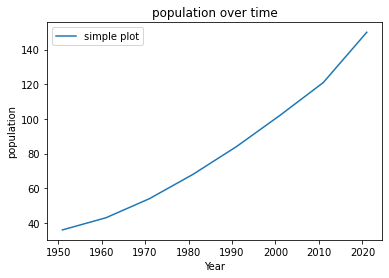

In [9]:
plt.plot(year,population,label='simple plot')
plt.xlabel('Year')
plt.ylabel('population')
plt.title('population over time')
plt.legend()
plt.show()

In [10]:
population

[36, 43, 54, 68, 84, 102, 121, 150]

Создадим инвертированный массив популяции. То есть просто тот же список `population`, только в обратном порядке.

In [11]:
population_revesrsed=population[::-1]

In [12]:
population_revesrsed

[150, 121, 102, 84, 68, 54, 43, 36]

А теперь отрисуем вместе два графика на одном холсте. Для этого просто вызовем два раза функцию `plt.plot()` передав разные значения координат по горизонтальной оси.

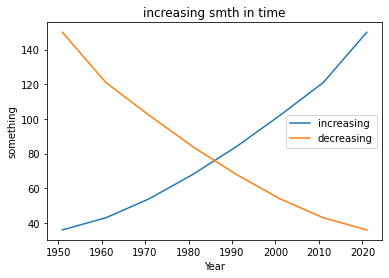

In [13]:
plt.plot(year,population,label='increasing')
plt.plot(year,population_revesrsed,label='decreasing')
plt.xlabel('Year')
plt.ylabel('something')
plt.title('increasing smth in time')
plt.legend()
plt.show()

Может быть мы не хотим рисовать две линии на одном графике. А хотим отрисовать два разных графика один под другим. Тогда нужно написать основной код для отрисовки каждой линии, и два раза вызвать `plt.show()` - это говорит библиотеке, что нужно вызвать две отдельных отрисовки.

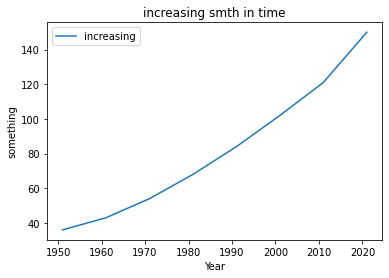

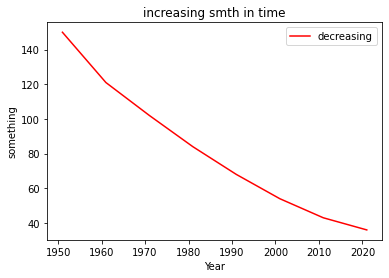

In [14]:
plt.plot(year,population,label='increasing')
plt.xlabel('Year')
plt.ylabel('something')
plt.title('increasing smth in time')
plt.legend()
plt.show()


plt.plot(year,population_revesrsed,label='decreasing',color='r')
plt.xlabel('Year')
plt.ylabel('something')
plt.title('increasing smth in time')
plt.legend()
plt.show()

Размер графика можно изменить с помощью параметра `figsize=(w,h)`, где `w` - размер по горизонтали, а `h` - размер по горизонатли. Заметим, что в этот раз мы в самом начале написали команду `plt.figure()`, для того, чтобы передать размеры холста. В предыдущих примерах стандартный холст создавался автоматически, но если мы хотим конфигурировать его, нам пришлось вручную вызвать объект холста, и передать ему требуемые параметры.

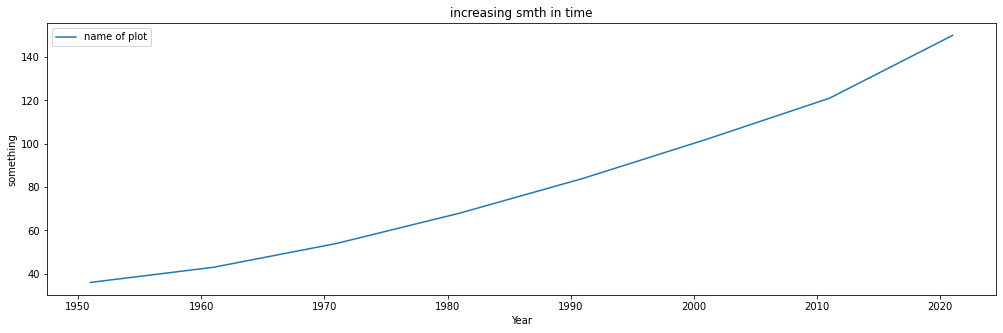

In [16]:
plt.figure(figsize=(17,5))
plt.plot(year,population,label='name of plot')
plt.xlabel('Year')
plt.ylabel('something')
plt.title('increasing smth in time')
plt.legend()
plt.show()

Цвет графика можно менять с помощью параметра `color` функции `plt.plot()`. Примеры используемых цветов:
* `r` или `red'
* `b` или `blue'
* `y` или `yellow'
* `g` или `green'
* `black`
* `white`
* `'#FFDD44'` - 16-ричный код (RRGGBB от 00 до FF)

Цвета можно конфигурировать по желанию.

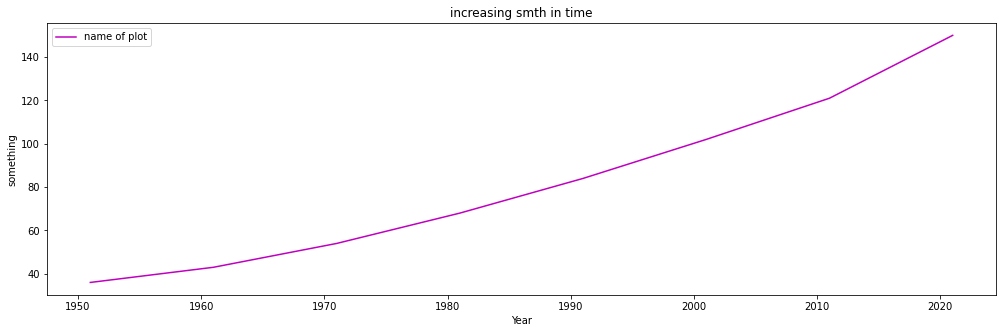

In [17]:
plt.figure(figsize=(17,5))
plt.plot(year,population,label='name of plot',color='m')
plt.xlabel('Year')
plt.ylabel('something')
plt.title('increasing smth in time')
plt.legend()
plt.show()

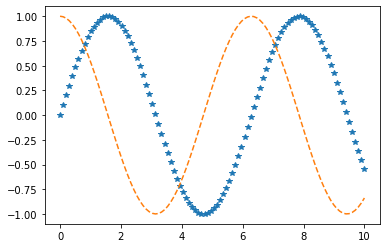

In [20]:
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x), '*')
plt.plot(x, np.cos(x), '--')
plt.show()

Может быть нам хочется отрисовать не два отдельных графика на двух разных полотнах, а два графика на одном полотне. В этом поможет функция `plt.subplots(nrows,ncols,figsize)` - она создает сетку из пустых холстов нужного размера. `nrows` - количество холстов в каждой строке, `ncols` - количество холстов в каждом столбце, `figsize` - общий размер сетки холстов. 

Давайте создадим сетке из одной строки и двух столбцов, то есть количество пустых холстов равно двум. Обращаться к каждому холсту можно как к массиву, по индксу переменной `axes`.

`plt.suptitle()` - пишет заголовок, общий для всех холстов сетки. Как бы **главный** заголовок.

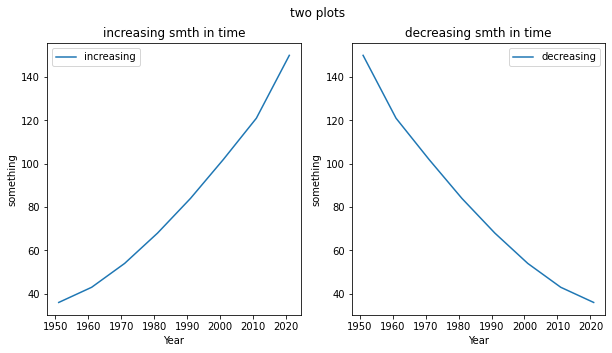

In [21]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
axes[0].plot(year,population,label='increasing')
axes[1].plot(year,population_revesrsed,label='decreasing')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('something')

axes[1].set_xlabel('Year')
axes[1].set_ylabel('something')

axes[0].set_title('increasing smth in time')
axes[1].set_title('decreasing smth in time')

axes[0].legend()
axes[1].legend()

plt.suptitle('two plots')
plt.show()

Что если у нас много холстов на графике? Писать отрисовку для каждого вручную будет долго, поэтому воспользуемся циклом.

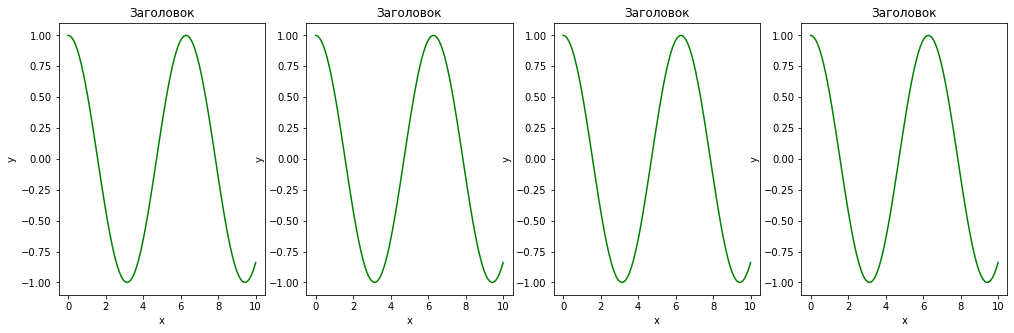

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(17,5))

x = np.linspace(0, 10, 100)
y = np.cos(x)
for ax in axes:
    ax.plot(x, y, 'g')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Заголовок')


Если у нас сетка из нескольких строк, то придется использовать два вложенных цикла. Внешним циклом мы пробегаемся по строкам сетки с холстами, а внутренним - по каждому холсту в этой строке.

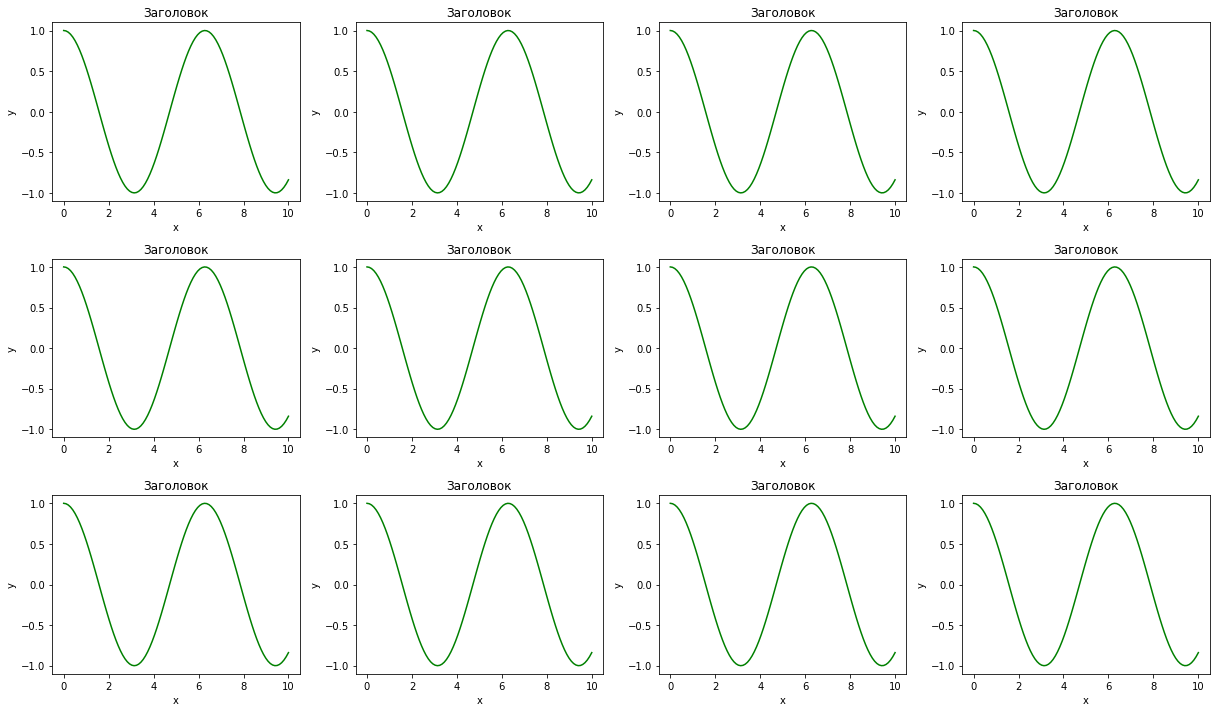

In [24]:
fig, axes = plt.subplots(nrows=3, ncols=4,figsize=(17,10))

x = np.linspace(0, 10, 100)
y = np.cos(x)
for row in axes:
    for ax in row:
        ax.plot(x, y, 'g')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_title('Заголовок')
plt.tight_layout()# автоматически сжимает графики, чтоб освободить пространство между ними

Можно так же конфигурировать стиль линий, которые мы хотим отрисовать.

In [25]:
'-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

('-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted')

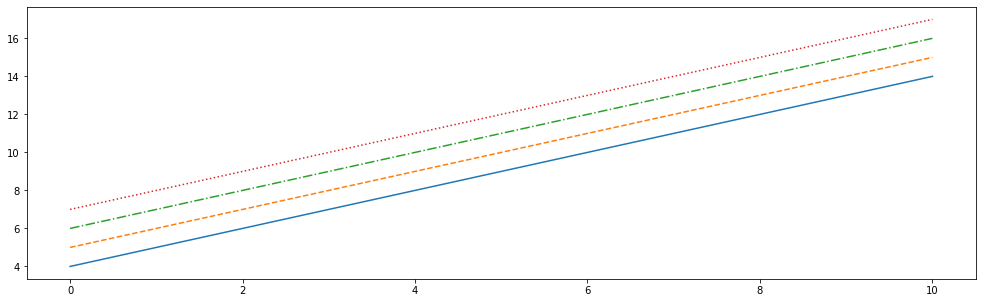

In [26]:
x = np.linspace(0, 10, 100)
plt.figure(figsize=(17,5))
plt.plot(x, x + 4, linestyle='-') # сплошная линия
plt.plot(x, x + 5, linestyle='--') # штриховая линия
plt.plot(x, x + 6, linestyle='-.') # штрихпунктирная линия
plt.plot(x, x + 7, linestyle=':'); # пунктирная линия
plt.show()

#### Scatter plot

Еще один часто используемый тип графиков — диаграммы рассеяния, или точечные графики. В них точки не соединяются отрезками линий, а представлены по отдельности точками, кругами или другими фигурами на графике.

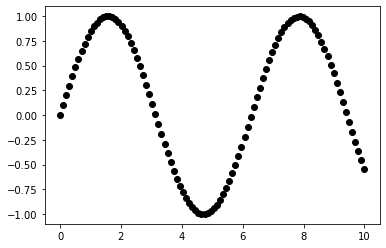

In [27]:
y = np.sin(x)

plt.plot(x, y, 'o', color='black')

Третий аргумент в вызове этой функции описывает тип символа, применяемого для графика. Для управления стилем линии можно использовать такие опции, как `'-'` и `'--'`. Для стиля маркера существует свой набор кратких строковых кодов. Полный список можно найти в документации по функции `plt.plot`. Продемонстрируем часто используемые. Ниже функция `plt.xlim(0, 1.8)` задает границы по горизонтальной оси, в которых нам хочется отрисовать график.



In [28]:
'o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd'

('o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd')

(0.0, 1.8)

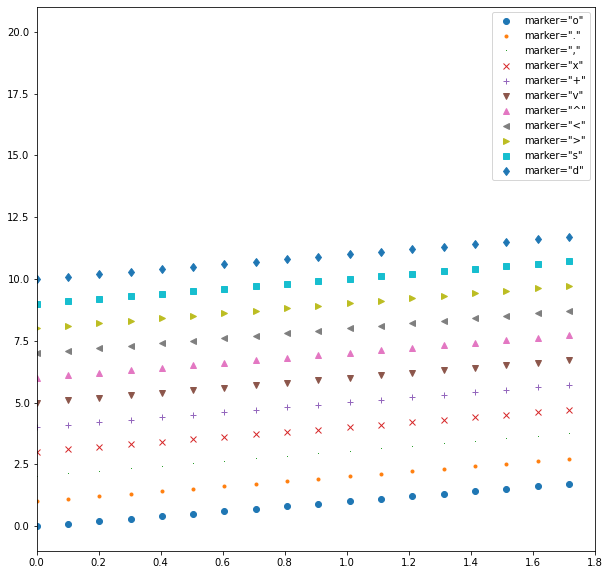

In [29]:
plt.figure(figsize=(10,10))
cnt = 0
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(x, x+cnt, marker, label = 'marker="{0}"'.format(marker))
    cnt+=1
plt.legend()
plt.xlim(0, 1.8)

Аналогичными возможностями обладает метод построения диаграмм рассеяния с помощью функции `plt.scatter`, во многом напоминающей функцию `plt.plot`.

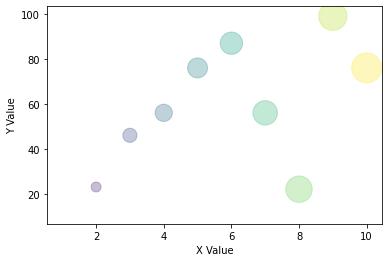

In [30]:
x=[1,2,3,4,5,6,7,8,9,10]
y=[11,23,46,56,76,87,56,22,99,76]
colors = range(len(x))
sizes = np.arange(len(x))*100
plt.scatter(x,y,c=colors,label='Scatter',s=sizes, alpha=0.3) 
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.show()

Основное различие между функциями `plt.scatter` и `plt.plot` состоит в том, что с помощью первой можно создавать диаграммы рассеяния с индивидуально задаваемыми (или выбираемыми в соответствии с данными) свойствами каждой точки (размер, цвет заливки, цвет рамки и т. д.).

#### Столбчатая диаграмма 

Еще один важный типо графиков - столбчатая диаграмма. Для ее отрисовки нужна функция `plt.bar(x,y)` - где `x` это значения по горизонтальной оси, а `y` по вертикальной.

Text(0.5, 1.0, 'Simple bar chart')

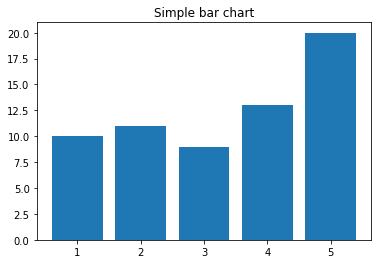

In [33]:
x = [1, 2, 3, 4, 5]
y = [10,11,9,13,20]

# bar()
fig = plt.figure()
plt.bar(x, y)
plt.title('Simple bar chart')


Text(0.5, 1.0, 'Simple bar chart')

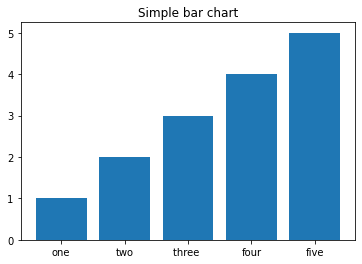

In [34]:
s = ['one','two','three ','four' ,'five']
x = [1, 2, 3, 4, 5]

fig = plt.figure()
plt.bar(s, x)
plt.title('Simple bar chart')


Нарисуем два набора столбчатых диаграмм на одном графике, выделив их разными цветами.

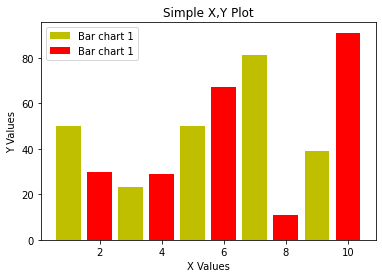

In [35]:
x1=[1,3,5,7,9]
y1=[50,23,50,81,39]

x2=[2,4,6,8,10]
y2=[30,29,67,11,91]

plt.bar(x1,y1,label='Bar chart 1',color='y')
plt.bar(x2,y2,label='Bar chart 1',color='r')


plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Simple X,Y Plot')
plt.legend()
plt.show()

Аналогично можно нарисовать горизонтальный bar plot, для этого испольузется функция `plt.barh()`.

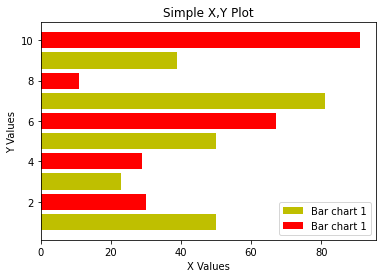

In [37]:
x1=[1,3,5,7,9]
y1=[50,23,50,81,39]

x2=[2,4,6,8,10]
y2=[30,29,67,11,91]

plt.barh(x1,y1,label='Bar chart 1',color='y')
plt.barh(x2,y2,label='Bar chart 1',color='r')

plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Simple X,Y Plot')
plt.legend()
plt.show() 

Пример - распределение возрастов.

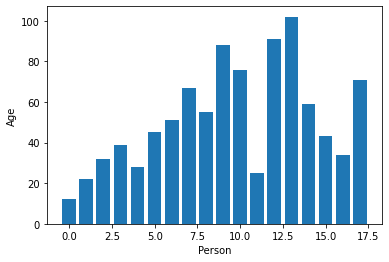

In [38]:
population=[12,22,32,39,28,45,51,67,55,88,76,25,91,102,59,43,34,71]
per=[x for x in range(len(population))]
plt.bar(per,population)
plt.xlabel('Person')
plt.ylabel('Age')
plt.show()


А можно отрисовать значения одного графика аккурат над значениями другого.

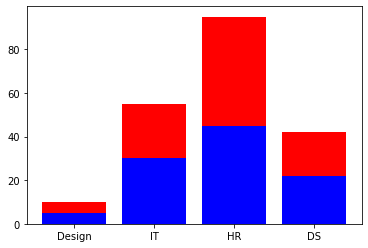

In [39]:
Men = [5., 30., 45., 22.]
Women = [5., 25., 50., 20.]


X = ['Design','IT','HR','DS']

plt.bar(X, Men, color = 'b')
plt.bar(X, Women, color = 'r',bottom=Men)
plt.show()

#### Гистограмма

Гистограмма состоит из примыкающих прямоугольников, расположенных вдоль оси `x`, которые разбиты на дискретные интервалы, их называют `bins`. Их высота пропорциональна частоте конкретного интервала. Такой способ визуализации часто используют в статистике для демонстрации распределения.

Для представления гистограммы есть функция `hist()`.

In [42]:
population

[12, 22, 32, 39, 28, 45, 51, 67, 55, 88, 76, 25, 91, 102, 59, 43, 34, 71]

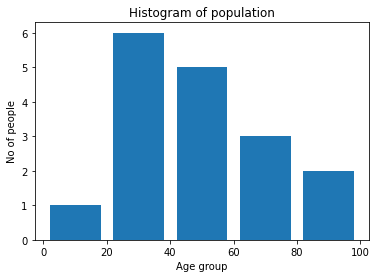

In [43]:
bins=[0,20,40,60,80,100]
plt.hist(population,bins,histtype='bar',rwidth=0.8)
plt.xlabel('Age group')
plt.ylabel('No of people')
plt.title('Histogram of population')
plt.show()

У функции `hist()` имеется множество параметров для настройки как вычисления, так и отображения. Вот пример гистограммы с детальными пользовательскими настройками:

In [44]:
data = np.random.randn(1000)

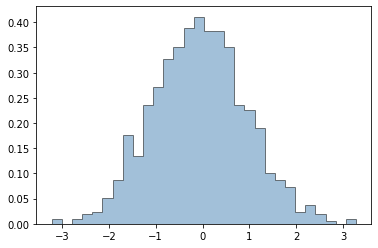

In [45]:
plt.hist(data, bins=30, density=True, alpha=0.5, histtype='stepfilled', color='steelblue', edgecolor='black')
plt.show()

#### Stack plot

Еще один не такой распространенный, но довольно удобный и показательный тип графика. Как можно понять из названия, он накладывает друг на друга значения из разных массивов с одинаковым индексом. В примере ниже с использованием этого графика представлен распорядок дня по дням недели - сколько времени уходит на разные активности.

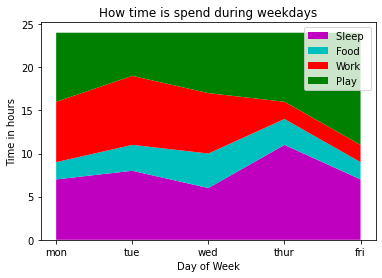

In [46]:
import numpy as np
days=['mon','tue','wed','thur','fri']
sleep=[7,8,6,11,7]
food=[2,3,4,3,2]
work=[7,8,7,2,2]
play=[8,5,7,8,13]
lab = ["Sleep ", "Food", "Work","Play"]
fig, ax = plt.subplots()
ax.stackplot(days, sleep, food, work,play, labels=lab,colors=['m','c','r','g'])
ax.legend(loc='upper right')
plt.xlabel('Day of Week')
plt.ylabel('Time in hours')
plt.title('How time is spend during weekdays')
plt.ioff()
plt.show()

#### Круговая диаграмма.

Еще один способ представления данных — круговая диаграмма, которую можно получить с помощью функции `pie()`.

Ддля нее нужно передать основной аргумент, представляющий собой список значений. А уже сама функция определит, какую часть пирога будет занимать каждое значение.

Также в случае с этими графиками есть другие особенности, которые определяются именованными аргументами. Например, если нужно задать последовательность цветов, используется аргумент colors. В таком случае придется присвоить список строк, каждая из которых будет содержать название цвета. Еще одна возможность — добавление меток каждой доле. Для этого есть labels, которой присваивает список строк с метками в последовательности.



`autopct` - автоматически вычисляет процентную долю каждого куска, а `explode` - позволяет "вынуть" из пирога определенный кусок, который мы хотим подсветить.

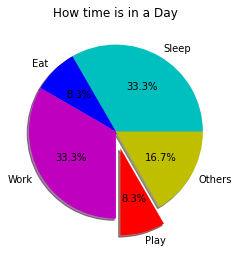

In [47]:
hours=[8,2,8,2,4]
activity=['Sleep','Eat','Work','Play','Others']
col=['c','b','m','r','y']
plt.pie(hours,labels=activity,colors=col,shadow=True,explode=(0,0,0,0.2,0),autopct='%1.1f%%')
plt.title('How time is in a Day')
plt.show()

#### 3D Scatter Plot

Так же в matplotlib можно рисовать трехмерные графики. Пример - ниже.

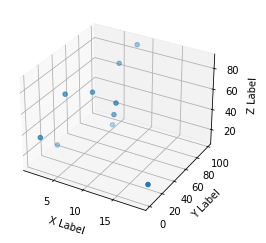

In [48]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x=[1,2,6,7,3,7,8,9,10,19]
y=[33,1,45,67,30,78,98,51,45,10]
z=[11,38,65,23,66,78,88,45,61,18]
ax.scatter(x, y, z)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()
plt.ioff() 
